In [23]:
import os
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [24]:
enmax_palette = ["#62D84E"]
color_codes_wanted = ['green']

# Set the palette
sns.set_palette(palette=enmax_palette)

# All Functions 

In [25]:
# All Functions 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericsflots = ['float16', 'float32', 'float64']
nonnumerics =['object']
date=['datetime64[ns]','datetime64']
nonnumericsAnddate=['object','datetime64[ns]']

def CalBasicStats(Source_DF,type):
    data = Source_DF
    newdf = pd.DataFrame()
    Resultdf= pd.DataFrame()

    if type=='numeric':
        Traversedf = data.select_dtypes(include=numerics)

        for i in Traversedf.columns:
            
        
        #newdf['DataSourceName']=[name]
            newdf['ColumnName']=[i]

            newdf['AllCounts'] = Traversedf[i].size
            newdf['NotNullCounts'] = Traversedf[i].count()
            newdf['UniqueCounts'] = Traversedf[i].nunique()
            
            newdf["%Zero"] = ((Traversedf[i] == 0).sum()/Traversedf[i].size)*100
            newdf["%Missing"]= 100-(Traversedf[i].count() / Traversedf[i].size)*100

            
            newdf['Min']=np.amin(Traversedf[i])
            newdf['Max']=np.amax(Traversedf[i])
            newdf['Mean']=np.mean(Traversedf[i])

            newdf['Average']=np.average(Traversedf[i])

            newdf['Median']=np.nanmedian(Traversedf[i],axis=0)
            newdf['StddDev']=np.std(Traversedf[i],axis=0)
            newdf['Var']=np.var(Traversedf[i],axis=0)

            newdf['Skewness']=skew(Traversedf[i].dropna())

            newdf['Kurtosis']=kurtosis(Traversedf[i].dropna())
    
            newdf['25Percentile'] = np.nanpercentile(Traversedf[i], 25,axis=0)
            newdf['50Percentile'] = np.nanpercentile(Traversedf[i], 50,axis=0)
            newdf['75Percentile'] = np.nanpercentile(Traversedf[i], 75,axis=0)
            
            
            # Resultdf=Resultdf.append(newdf)
            Resultdf=pd.concat((Resultdf, newdf), axis = 0)
        #newdf["UniueRecords"]=pd.count(Traversedf[i])
        return Resultdf

    else:
        Traversedf = data.select_dtypes(include=nonnumerics) 

        for i in Traversedf.columns:
                # print(i)
        #newdf['DataSourceName']=[name]
            newdf['ColumnName']=[i]
            newdf['AllCounts'] = Traversedf[i].size
            newdf['NotNullCounts'] = Traversedf[i].count()
            newdf['UniqueCounts'] = Traversedf[i].nunique()

            newdf["%Missing"]= 100-(Traversedf[i].count() / Traversedf[i].size)*100

            Resultdf=pd.concat((Resultdf, newdf), axis = 0)     

        return Resultdf

# Step 1: Reading the CSV File 

In [26]:
encoding = "cp1252"
encoding = "ISO-8859-1"
Sourcedf=pd.read_csv('/Users/rohit.jishtu/Documents/My Projects/Project Personal/YouTube/Global YouTube Statistics.csv',encoding=encoding)

# Step 2: Basic Stats 

In [27]:
# Step 2: Basic Data Frame checks
print('Shape of the data frame is ',Sourcedf.shape)

#basic Stats of the columns Created automated function 


outdf_numeric = CalBasicStats(Sourcedf,'numeric')
outdf_nonnumeric = CalBasicStats(Sourcedf,'Non-numeric')

outdf_numeric.head(10)

Shape of the data frame is  (995, 28)


,ColumnName,AllCounts,NotNullCounts,UniqueCounts,%Zero,%Missing,Min,Max,Mean,Average,Median,StddDev,Var,Skewness,Kurtosis,25Percentile,50Percentile,75Percentile
0,rank,995,995,995,0.000000,0.000000,1.0,9.950000e+02,4.980000e+02,4.980000e+02,4.980000e+02,2.872316e+02,8.250200e+04,0.000000,-1.200002,2.495000e+02,4.980000e+02,7.465000e+02
0,subscribers,995,995,289,0.000000,0.000000,12300000.0,2.450000e+08,2.298241e+07,2.298241e+07,1.770000e+07,1.751730e+07,3.068557e+14,5.505327,45.509737,1.450000e+07,1.770000e+07,2.460000e+07
0,video views,995,995,988,0.804020,0.000000,0.0,2.280000e+11,1.103954e+10,1.103954e+10,7.760820e+09,1.410375e+10,1.989158e+20,7.198995,82.540784,4.288145e+09,7.760820e+09,1.355470e+10
0,uploads,995,995,777,4.321608,0.000000,0.0,3.013080e+05,9.187126e+03,9.187126e+03,7.290000e+02,3.413419e+04,1.165143e+09,5.658304,35.443167,1.945000e+02,7.290000e+02,2.667500e+03
0,video_views_rank,995,994,953,0.000000,0.100503,1.0,4.057944e+06,5.542489e+05,NaN,9.155000e+02,1.362097e+06,1.855307e+12,2.112056,2.510147,3.230000e+02,9.155000e+02,3.584500e+03
0,country_rank,995,879,246,0.000000,11.658291,1.0,7.741000e+03,3.860535e+02,NaN,5.100000e+01,1.231544e+03,1.516700e+06,4.190275,17.880580,1.100000e+01,5.100000e+01,1.230000e+02
0,channel_type_rank,995,962,286,0.000000,3.316583,1.0,7.741000e+03,7.457193e+02,NaN,6.550000e+01,1.943376e+03,3.776709e+06,2.746796,6.018127,2.700000e+01,6.550000e+01,1.397500e+02
0,video_views_for_the_last_30_days,995,939,908,0.000000,5.628141,1.0,6.589000e+09,1.756103e+08,NaN,6.408500e+07,4.161564e+08,1.731861e+17,8.763084,110.914001,2.013750e+07,6.408500e+07,1.688265e+08
0,lowest_monthly_earnings,995,995,557,11.859296,0.000000,0.0,8.509000e+05,3.688615e+04,3.688615e+04,1.330000e+04,7.182261e+04,5.158487e+09,4.789829,31.856608,2.700000e+03,1.330000e+04,3.790000e+04
0,highest_monthly_earnings,995,995,736,8.944724,0.000000,0.0,1.360000e+07,5.898078e+05,5.898078e+05,2.127000e+05,1.148045e+06,1.318008e+12,4.787795,31.819317,4.350000e+04,2.127000e+05,6.068000e+05


In [28]:
outdf_nonnumeric.head(10)

,ColumnName,AllCounts,NotNullCounts,UniqueCounts,%Missing
0,Youtuber,995,995,995,0.000000
0,category,995,949,18,4.623116
0,Title,995,995,992,0.000000
0,Country,995,873,49,12.261307
0,Abbreviation,995,873,49,12.261307
0,channel_type,995,965,14,3.015075
0,created_month,995,990,12,0.502513


In [29]:

def TOP10List(column):
    outdf_numeric['Rank']=outdf_numeric[column].rank(ascending=False)
    Part1= outdf_numeric[(outdf_numeric['Rank'] <10)]['ColumnName'].to_list()
    if column in ('NotNullCounts','UniqueCounts','%Missing'):
        outdf_nonnumeric['Rank']=outdf_nonnumeric[column].rank(ascending=False)
        Part2= outdf_nonnumeric[outdf_nonnumeric['Rank'] <10]['ColumnName'].to_list()
        return Part1+Part2 
    return Part1 


In [30]:
TopMissing_Vars=TOP10List('%Missing')
print('Top Missing Vars',TopMissing_Vars)

TopZero_Vars=TOP10List('%Zero')
print('Top Zero % Vars',TopZero_Vars)

TopVariance_Vars=TOP10List('Var')
print('Top Variance',TopVariance_Vars)

Top Missing Vars ['country_rank', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days', 'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude', 'Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type', 'created_month']
Top Zero % Vars ['video views', 'uploads', 'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']
Top Variance ['subscribers', 'video views', 'video_views_rank', 'video_views_for_the_last_30_days', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings', 'Population', 'Urban_population']


# Step3 : Handling Missing values and outliers 

In [31]:
# Distribution Plots for all variables 
def CustomPlots(data,plot='hist'):
    colslist=data.columns.to_list()
    # row=math.floor(len(colslist)/4)+1

    if plot=='hist':
        col=4
        row=len(colslist)//col  + math.ceil((len(colslist)%col)/col)
        fig,ax=plt.subplots(nrows=row, ncols=col,figsize=(15,row*(col*0.75)))
        axes = ax.flatten()
        for prog, ax in zip(colslist, axes):
            ax = sns.histplot(data[prog], kde=True, color='g',ax=ax)

               
    elif plot=='box':
        col=4
        row=len(colslist)//col  + math.ceil((len(colslist)%col)/col)
        fig,ax=plt.subplots(nrows=row, ncols=col,figsize=(12,row*(col*0.75)))
        axes = ax.flatten()
        for prog, ax in zip(colslist, axes):
            ax = sns.boxplot(data[prog], color='g',ax=ax).set(xlabel=prog)
    

    plt.tight_layout()

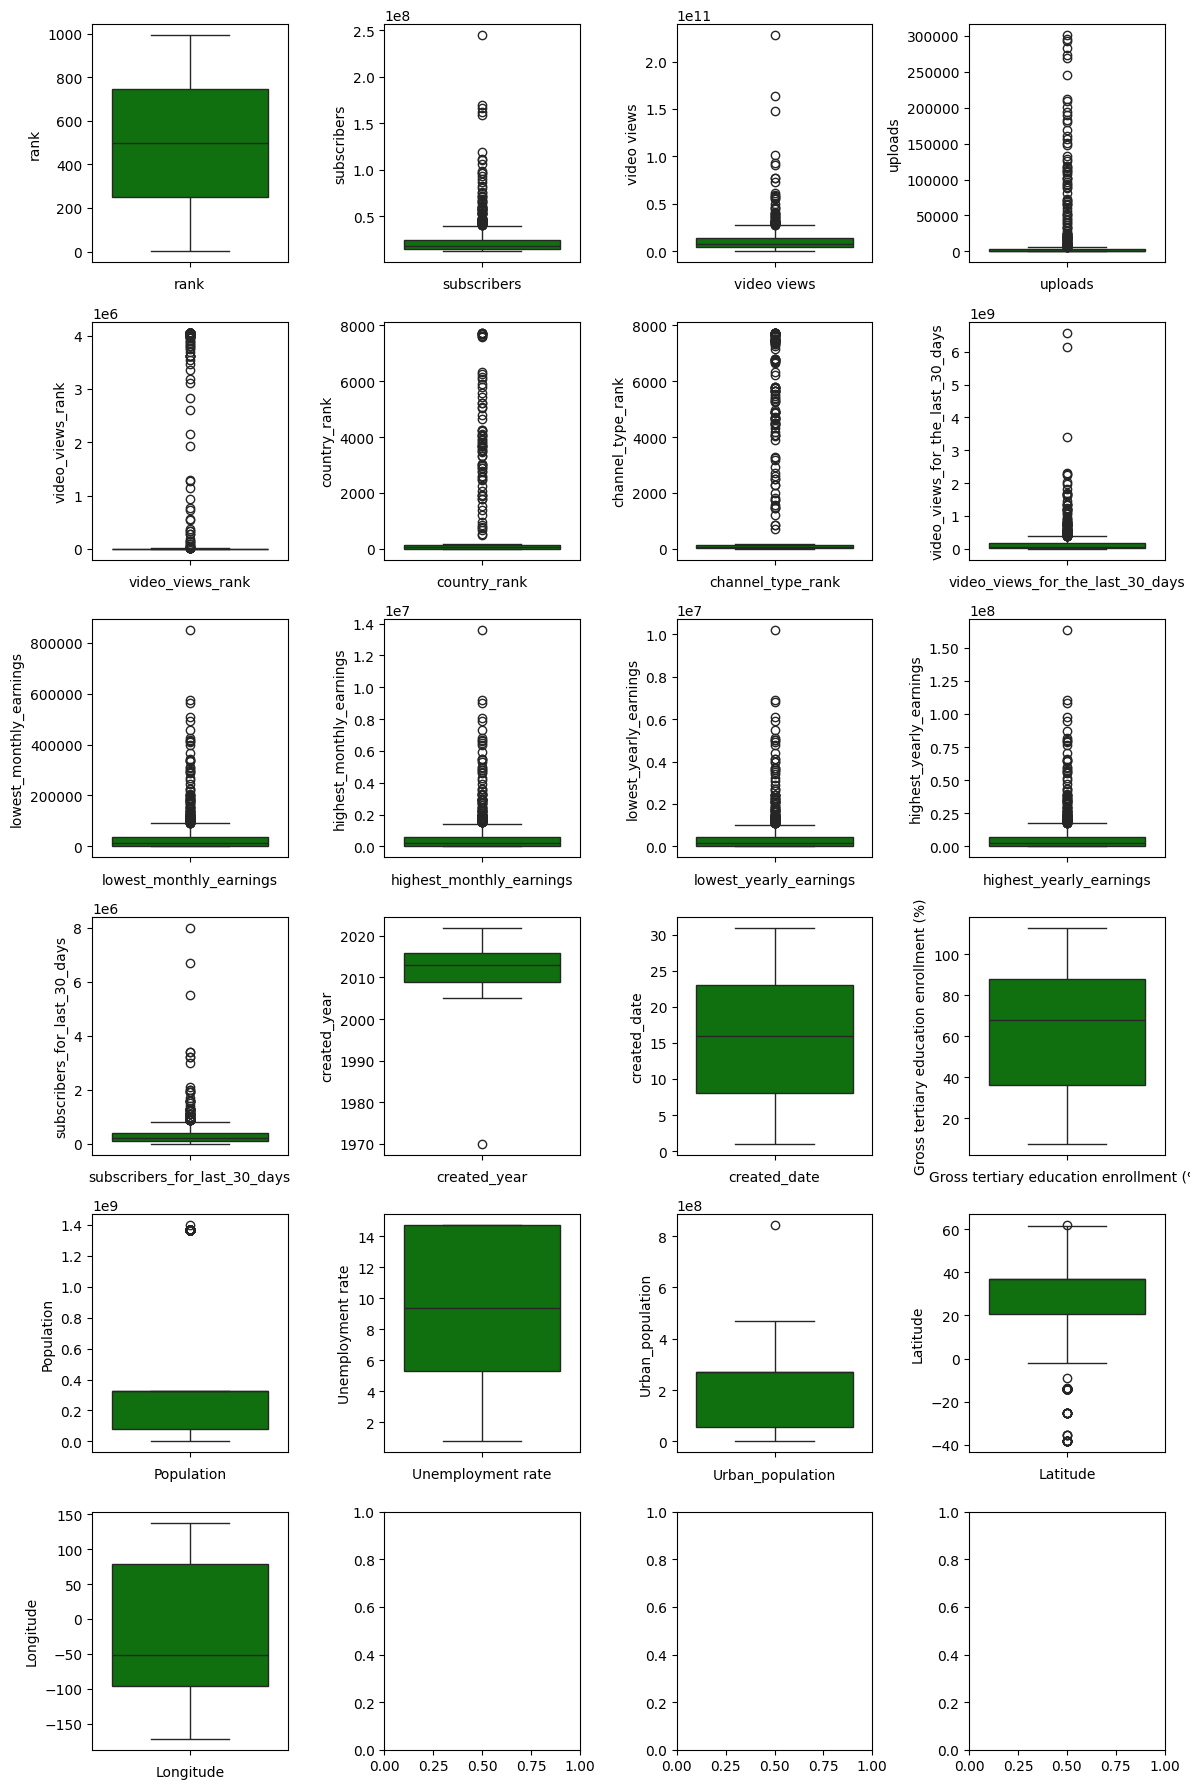

In [32]:
Cols_numeric=outdf_numeric['ColumnName'].unique()
CustomPlots(Sourcedf[Cols_numeric],'box')

In [33]:
# Missing Values Plots for all Top Missing Values 
# Missing value Library 
# Outliers Plots for all outliers 

<Axes: >

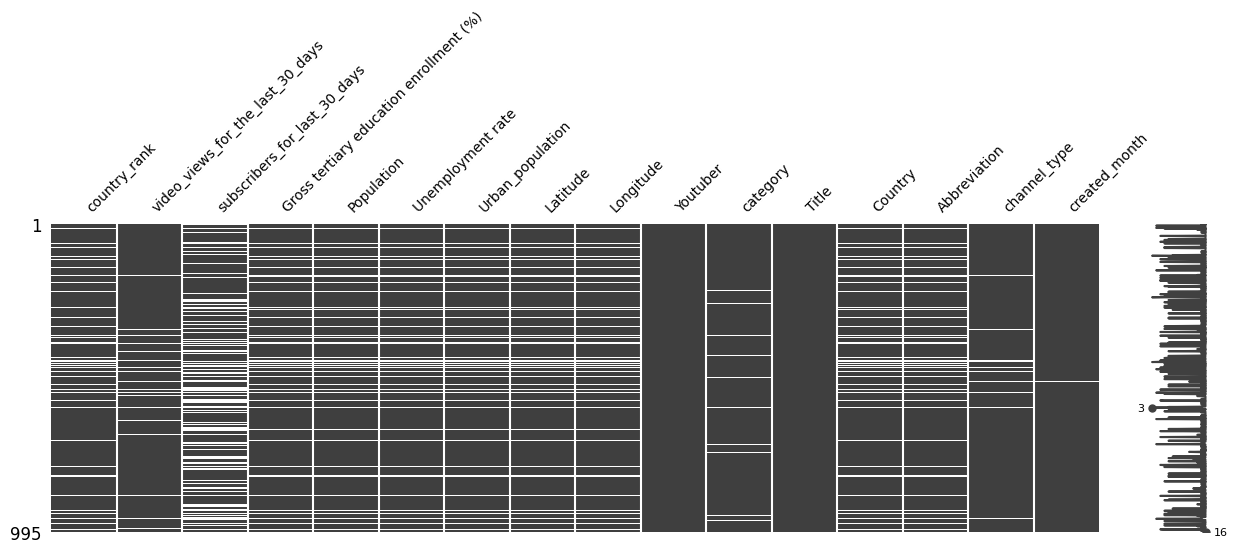

In [34]:
# Missing Value Plots 
import missingno as msno

msno.matrix(Sourcedf[TopMissing_Vars], figsize=(15, 4), fontsize=10)


In [35]:
# Missing value Treatment 

# Since One record data exists , keeping missing value is okay for analysis , but imputing them would interfere with the results 

In [36]:
# Outlier Treatment 
# Above IQR removing all the values .


def LimitOutlier(data,i):
        # dict={}
        Q1=np.nanpercentile(data[i],25)
        Q2=np.median(data[i])
        Q3=np.nanpercentile(data[i],75)
        Q4=np.nanpercentile(data[i],100)
        # print(Q1,Q2,Q3,Q4)
        IQR=Q3-Q1
        low_lim = Q1 - (1.5 * IQR)
        up_lim = Q3 + (1.5 * IQR)
        return low_lim,up_lim


def reoveOutlier(data):
        Map={}
        MapTemp={}
        result=pd.DataFrame()
        for i in data.columns:
                # print('i is',i)
                low_lim,up_lim=LimitOutlier(data,i)
                Map[i]=low_lim,up_lim
        return Map

columns=outdf_numeric['ColumnName'].unique()
Result=reoveOutlier(Sourcedf[outdf_numeric['ColumnName'].unique()])
Result


{'rank': (-496.0, 1492.0),
 'subscribers': (-650000.0, 39750000.0),
 'video views': (-9611689254.5, 27454536517.5),
 'uploads': (-3515.0, 6377.0),
 'video_views_rank': (-4569.25, 8476.75),
 'country_rank': (-157.0, 291.0),
 'channel_type_rank': (-142.125, 308.875),
 'video_views_for_the_last_30_days': (-202896000.0, 391860000.0),
 'lowest_monthly_earnings': (-50100.0, 90700.0),
 'highest_monthly_earnings': (-801450.0, 1451750.0),
 'lowest_yearly_earnings': (-601025.0, 1088775.0),
 'highest_yearly_earnings': (-9645625.0, 17467375.0),
 'subscribers_for_last_30_days': (-350000.0, 850000.0),
 'created_year': (1998.5, 2026.5),
 'created_date': (-14.5, 45.5),
 'Gross tertiary education enrollment (%)': (-41.55000000000001, 166.05),
 'Population': (-283970757.0, 695565691.0),
 'Unemployment rate': (-8.875, 28.845),
 'Urban_population': (-266223752.0, 592795096.0),
 'Latitude': (-4.151150000000005, 61.835074000000006),
 'Longitude': (-357.72654750000004, 340.9765365)}

In [37]:
Sourcedf[Sourcedf['Urban_population']>592795096]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
507,508,ýýýýýýýýý Liziqi,17600000,2.977742e+09,Howto & Style,ýýýýýýýýý Liziqi,128,China,CN,Howto,...,100000.0,2017.0,Aug,22.0,50.6,1.397715e+09,4.32,842933962.0,35.86166,104.195397


In [38]:
Sourcedf.shape
# (871, 28) --Before 

# (230, 28) --After

(995, 28)

In [39]:
cols=Sourcedf[outdf_numeric['ColumnName'].unique()]
for i in cols:
     print(i)
     Sourcedf = Sourcedf[(Sourcedf[i]<Result[i][1])] 
     Sourcedf = Sourcedf[(Sourcedf[i]>Result[i][0])] 


rank
subscribers
video views
uploads
video_views_rank
country_rank
channel_type_rank
video_views_for_the_last_30_days
lowest_monthly_earnings
highest_monthly_earnings
lowest_yearly_earnings
highest_yearly_earnings
subscribers_for_last_30_days
created_year
created_date
Gross tertiary education enrollment (%)
Population
Unemployment rate
Urban_population
Latitude
Longitude


# Step 4 : Data Analysis


In [40]:
# Understanding Target and Distribution 

Sourcedf

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
76,77,shfa2 - ï¿½ï¿½,39700000,2.388482e+10,People & Blogs,shfa2 - ï¿½ï¿½,1596,United Arab Emirates,AE,People,...,300000.0,2017.0,Nov,6.0,36.8,9770529.0,2.35,8479744.0,23.424076,53.847818
79,80,XXXTENTACION,39200000,1.050747e+10,Music,XXXTENTACION,133,United States,US,Music,...,100000.0,2015.0,Jun,23.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
81,82,Mikecrack,39100000,1.611818e+10,Gaming,Mikecrack,1876,Spain,ES,Games,...,800000.0,2015.0,Jul,13.0,88.9,47076781.0,13.96,37927409.0,40.463667,-3.749220
90,91,Daddy Yankee,38000000,2.273142e+10,Music,Daddy Yankee,505,United States,US,Music,...,100000.0,2011.0,May,16.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
91,92,Vlad vï¿½ï¿½ï,37900000,2.351015e+10,NaN,Vlad vï¿½ï¿½ï,515,United States,US,Entertainment,...,200000.0,2018.0,Jul,20.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,956,First We Feast,12500000,2.983800e+09,Howto & Style,First We Feast,1076,United States,US,Entertainment,...,200000.0,2014.0,Feb,28.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891
961,962,elcarteldesantatv,12500000,7.489455e+09,Music,elcarteldesantatv,377,Mexico,MX,Entertainment,...,100000.0,2008.0,Nov,27.0,40.2,126014024.0,3.42,102626859.0,23.634501,-102.552784
977,978,Timba Vk,12400000,2.840138e+09,Gaming,Timba Vk,1024,Spain,ES,Games,...,100000.0,2012.0,Jun,16.0,88.9,47076781.0,13.96,37927409.0,40.463667,-3.749220
988,989,Caylus,12400000,4.779140e+09,Education,Caylus,1340,United States,US,Games,...,400000.0,2016.0,Apr,6.0,88.2,328239523.0,14.70,270663028.0,37.090240,-95.712891


/var/folders/6y/6hsqd4ts2n3cjf9tpct0b36h0000gp/T/ipykernel_69944/475761660.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Sourcedf.corr()


<Axes: >

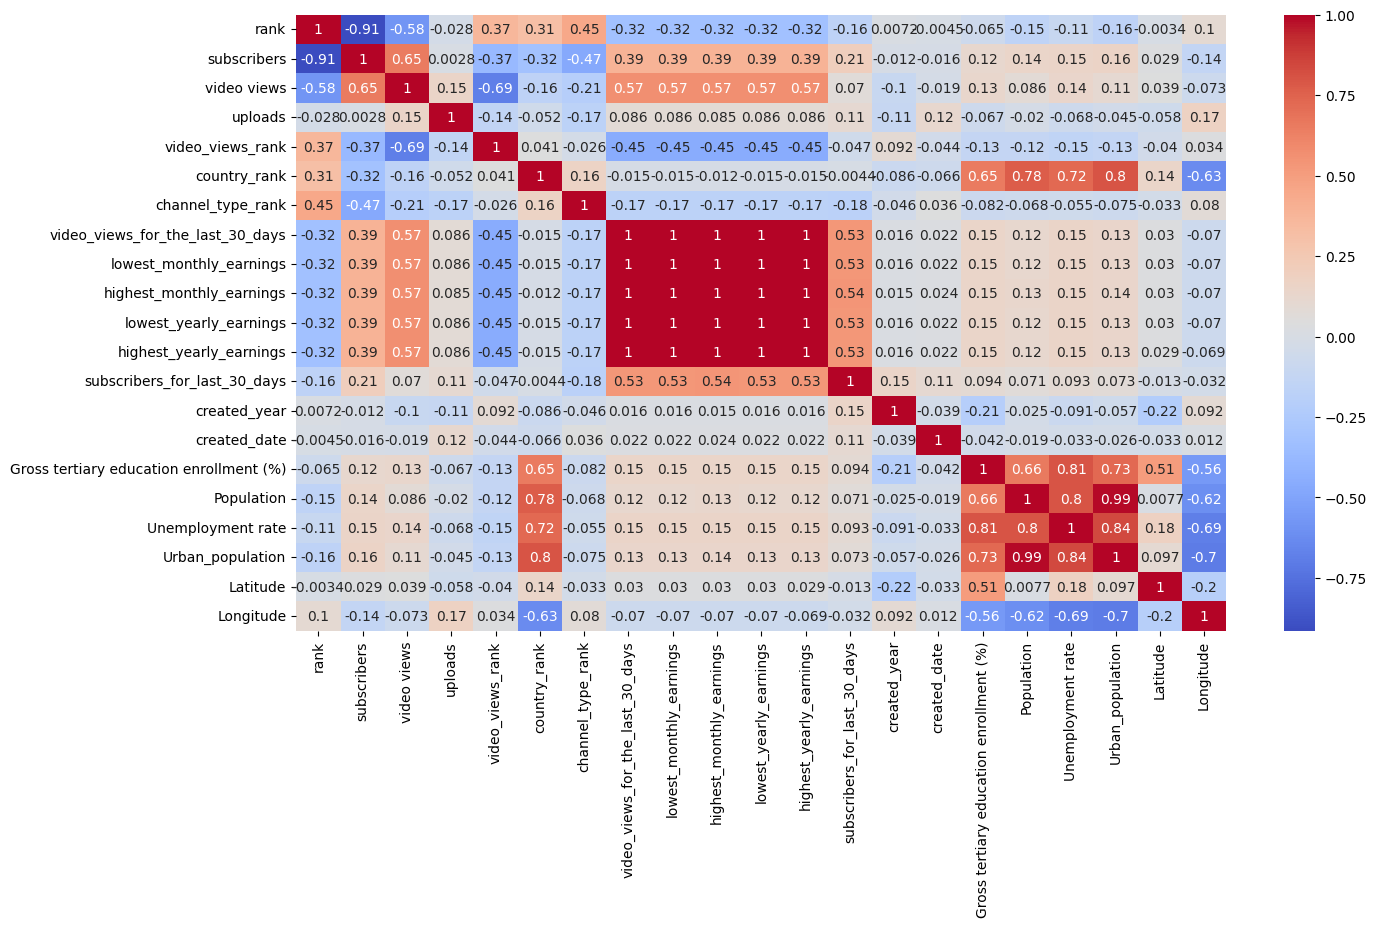

In [41]:
# Correlation Plots 

correlation_matrix = Sourcedf.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



In [42]:
# Plots 


def Scatter_Plotwithtarget(df,x,y,z):
    sns.scatterplot(x=x, y=y,hue=z)

plt.figure(figsize=(5, 3))
def Bar_Plotwithtarget(df,x,y):
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=x, hue=y,width=1.8,palette="crest")
    
    # Rotate the x-axis tick labels by 45 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Place the hue legend on top
    plt.show()



<Figure size 500x300 with 0 Axes>

In [43]:
Sourcedf.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

/var/folders/6y/6hsqd4ts2n3cjf9tpct0b36h0000gp/T/ipykernel_69944/2719483165.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


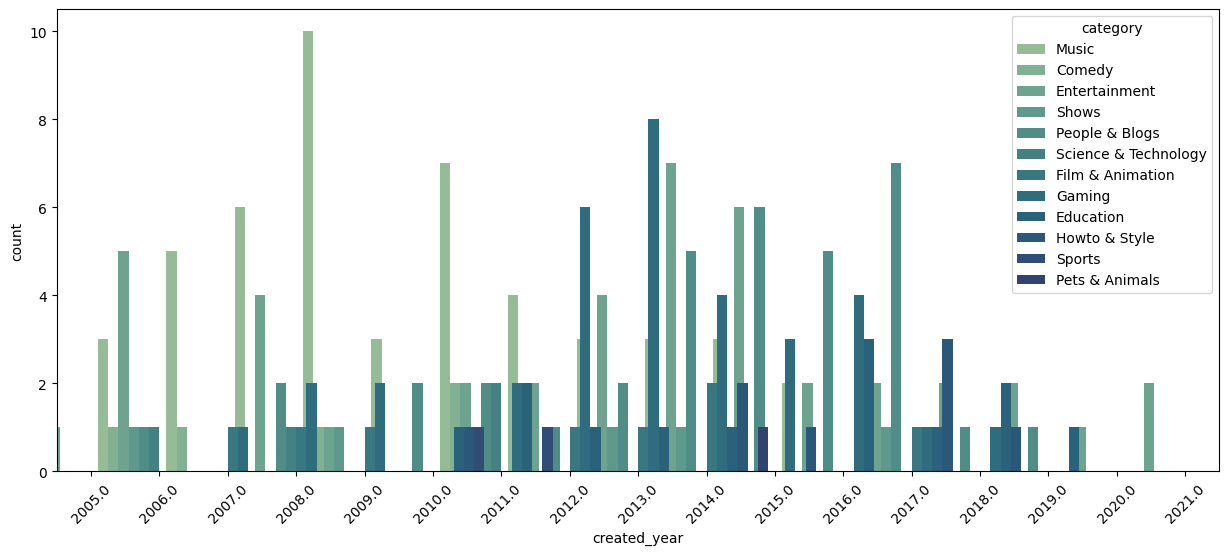

In [44]:

Bar_Plotwithtarget(Sourcedf,Sourcedf['created_year'],Sourcedf['category'])


# Category and Videos Over the Years 



In [48]:
Sourcedf.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# Q1 : Trending Topics wrt Months 

In [67]:


Sourcedf['VideoViewsRatio']=Sourcedf['video views']/Sourcedf['subscribers_for_last_30_days']
Groupdf= Sourcedf.groupby(['created_month','category'])['Youtuber'].count().reset_index()
df=Groupdf
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Convert 'created_month' to a categorical data type with custom order
df['created_month'] = pd.Categorical(df['created_month'], categories=month_order, ordered=True)


,created_month,category,Youtuber
0,Apr,Comedy,1
1,Apr,Education,1
2,Apr,Entertainment,6
3,Apr,Gaming,3
4,Apr,Music,2
...,...,...,...
77,Sep,Film & Animation,2
78,Sep,Howto & Style,2
79,Sep,Music,5
80,Sep,People & Blogs,3


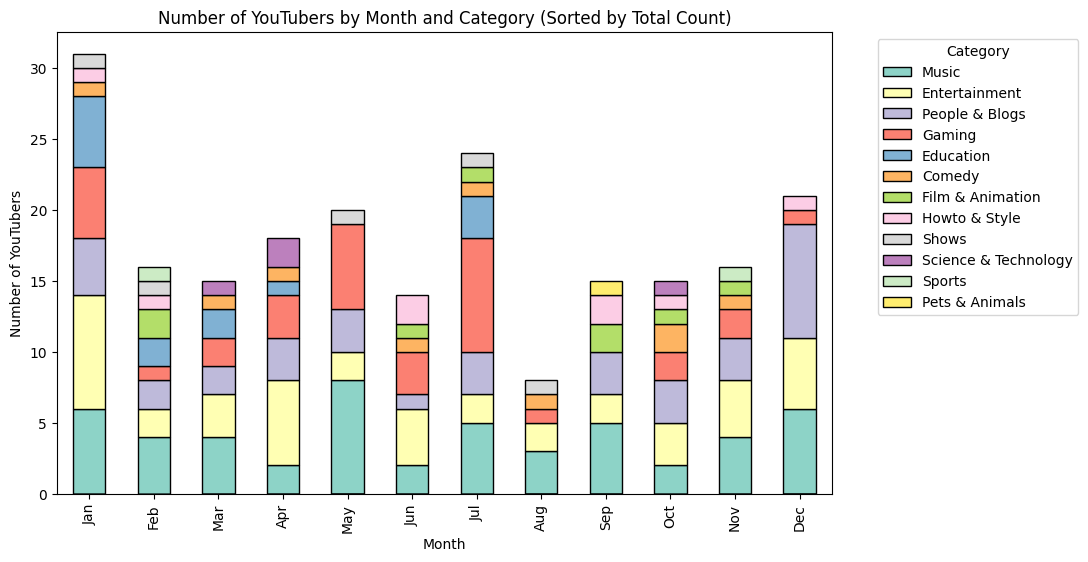

In [93]:
# Define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'created_month' to a categorical data type with custom order
df['created_month'] = pd.Categorical(df['created_month'], categories=month_order, ordered=True)

# Pivot the DataFrame for better plotting
pivot_df = df.pivot_table(index='category', columns='created_month', values='Youtuber', fill_value=0)

# Sort the DataFrame by the total count (Youtuber)
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total', ascending=False)
pivot_df = pivot_df.drop(columns='Total')

# Plotting
ax = pivot_df.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of YouTubers')
plt.title('Number of YouTubers by Month and Category (Sorted by Total Count)')



plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Q2. Geospatial Visualization: Visualize the distribution of successful YouTube channels on a world map and uncover geographical trends.


In [94]:

Sourcedf['VideoViewsRatio']=Sourcedf['video views']/Sourcedf['subscribers_for_last_30_days']
Groupdf= Sourcedf.groupby(['Latitude','Longitude','category'])['VideoViewsRatio'].max().reset_index()
df=Groupdf



# ['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
#        'uploads', 'Country', 'Abbreviation', 'channel_type',
#        'video_views_rank', 'country_rank', 'channel_type_rank',
#        'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
#        'highest_monthly_earnings', 'lowest_yearly_earnings',
#        'highest_yearly_earnings', 'subscribers_for_last_30_days',
#        'created_year', 'created_month', 'created_date',
#        'Gross tertiary education enrollment (%)', 'Population',
#        'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
#       dtype='object'

In [95]:
df

,Latitude,Longitude,category,VideoViewsRatio
0,-1.831239,-78.183406,Entertainment,26131.974470
1,-1.831239,-78.183406,People & Blogs,9597.546387
2,-0.789275,113.921327,Education,118190.515520
3,-0.789275,113.921327,Entertainment,71953.148000
4,-0.789275,113.921327,Gaming,30493.222920
...,...,...,...,...
62,56.130366,-106.346771,Gaming,64123.135700
63,56.130366,-106.346771,Science & Technology,18205.599120
64,61.524010,105.318756,Comedy,44483.347160
65,61.524010,105.318756,Gaming,66685.078560


In [108]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Create a folium map centered around the average latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Add a HeatMap layer with the given latitude, longitude, and weight (VideoViewsRatio)
heat_data = [[row['Latitude'], row['Longitude'], row['VideoViewsRatio']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(mymap)


# Display the map in the notebook
# display(mymap)


# Q3. Earnings Analysis: Explore the correlation between channel performance and estimated earnings.

In [119]:
Sourcedf['Perf']=Sourcedf['video_views_for_the_last_30_days']/Sourcedf['subscribers_for_last_30_days']
Groupdf= Sourcedf.groupby(['channel_type','highest_monthly_earnings'])['Perf'].mean().reset_index()
df=Groupdf

df

,channel_type,highest_monthly_earnings,Perf
0,Animals,0.0,29.8900
1,Comedy,109800.0,274.4500
2,Comedy,226100.0,565.3400
3,Comedy,272600.0,170.3900
4,Comedy,287500.0,718.7000
...,...,...,...
219,Tech,53000.0,132.4600
220,Tech,209300.0,523.2500
221,Tech,335800.0,839.4300
222,Tech,354500.0,443.1250


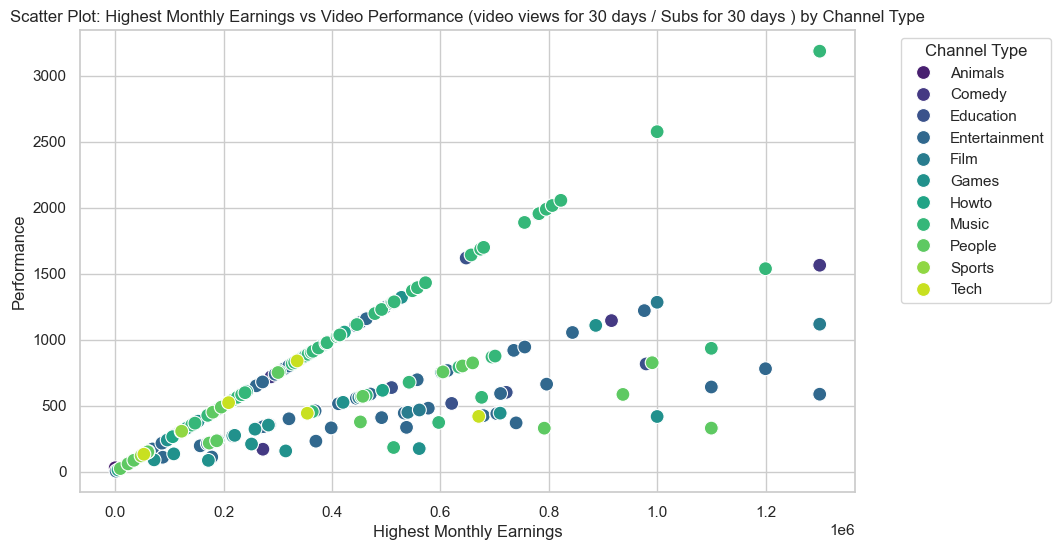

In [122]:
# Set seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with colors based on categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='highest_monthly_earnings', y='Perf', hue='channel_type', data=df, palette='viridis', s=100)

# Set plot labels and title
plt.xlabel('Highest Monthly Earnings')
plt.ylabel('Performance')
plt.title('Scatter Plot: Highest Monthly Earnings vs Video Performance (video views for 30 days / Subs for 30 days ) by Channel Type')

# Show the plot
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()